# Prueba Intertrimestral

**Nombre:**  Susana
**Apellidos:**  Fraga Ortiz

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [3]:
def imc(weight, height):
    ## weight= en kg
    ## height= en metros
    return round(weight / (height ** 2), 2)

In [6]:
## Ejemplo propio
resultado = imc(60, 1.70)

print(f"El IMC es: {resultado}") 

El IMC es: 20.76


b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [7]:
def saludable(imcValue):
    if imcValue < 18.5:
        return "Bajo peso"
    elif 18.5 <= imcValue <= 24.9:
        return "Saludable"
    else:
        return "Sobrepeso"

In [9]:
## Ejemplo propio
resultado1 = saludable(resultado)

print(f"Esta persona está: {resultado1}") 

Esta persona está: Saludable


c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [11]:
# Generación de pesos y alturas 
np.random.seed(42) 
pesos = np.random.uniform(45, 95, 10).round(1)     # pesos entre 45 y 95 kg
alturas = np.random.uniform(1.5, 1.9, 10).round(2) # alturas entre 1.50 y 1.90 m

# Creación del DataFrame
imcData = pd.DataFrame({"peso": pesos,"altura": alturas})

# Calcular el IMC y la categoría (cuarta columna)
imcData["imc"] = imcData.apply(lambda row: imc(row["peso"], row["altura"]), axis=1)
imcData["categoria"] = imcData["imc"].apply(saludable)

In [12]:
def basicStats(df):
    print(df.shape)
    print(df.head())
    print(df.isna().sum())
    print(df.dtypes)
    print(df.describe(include='all'))

basicStats(imcData)

(10, 4)
   peso  altura    imc  categoria
0  63.7    1.51  27.94  Sobrepeso
1  92.5    1.89  25.90  Sobrepeso
2  81.6    1.83  24.37  Saludable
3  74.9    1.58  30.00  Sobrepeso
4  52.8    1.57  21.42  Saludable
peso         0
altura       0
imc          0
categoria    0
dtype: int64
peso         float64
altura       float64
imc          float64
categoria     object
dtype: object
             peso     altura        imc  categoria
count   10.000000  10.000000  10.000000         10
unique        NaN        NaN        NaN          3
top           NaN        NaN        NaN  Sobrepeso
freq          NaN        NaN        NaN          6
mean    71.000000   1.657000  25.707000        NaN
std     15.789096   0.121386   4.263825        NaN
min     47.900000   1.510000  18.250000        NaN
25%     55.525000   1.572500  22.157500        NaN
50%     75.000000   1.620000  26.415000        NaN
75%     81.300000   1.700000  29.485000        NaN
max     92.500000   1.890000  30.640000        NaN


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [65]:
class HealthTools:
    def __init__(self, weights, heights):
        self.weights = weights
        self.heights = heights

    def imc(self, weight, height):
        return round(weight / (height ** 2), 2)
    
    def saludable(self, imcValue):
        if imcValue < 18.5:
            return "Bajo peso"
        elif 18.5 <= imcValue <= 24.9:
            return "Saludable"
        else:
            return "Sobrepeso"

    def generar_dataframe(self):
        xxxxx
        return df


## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [16]:
lifeStyleData = pd.read_csv("Final_data.csv")

# Mostramos las 5 primeras filas
display(lifeStyleData.head())

# Número de filas y columnas
print(f"\nEl dataset tiene {lifeStyleData.shape[0]} filas y {lifeStyleData.shape[1]} columnas.")


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low



El dataset tiene 20000 filas y 54 columnas.


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [20]:
def describeData(dataFrame):
    valores = pd.DataFrame({
        "tipo_de_dato": dataFrame.dtypes,
        "num_nulos": dataFrame.isnull().sum(),
        "porcentaje_nulos": (dataFrame.isnull().mean() * 100)
    })
    return valores

c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [22]:
resumen_dataset = describeData(lifeStyleData)
display(resumen_dataset)

,tipo_de_dato,num_nulos,porcentaje_nulos
Age,float64,0,0.000
Gender,object,0,0.000
Weight (kg),float64,0,0.000
Height (m),float64,0,0.000
Max_BPM,float64,1,0.005
Avg_BPM,float64,1,0.005
Resting_BPM,float64,0,0.000
Session_Duration (hours),float64,0,0.000
Calories_Burned,float64,0,0.000
Workout_Type,object,0,0.000


Las variables que tienen más valores faltantes son cholesterol_mg, avg_bpm, max_bpm. Representan un 0,005 % sobre las variables de cada una de las columnas. 

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

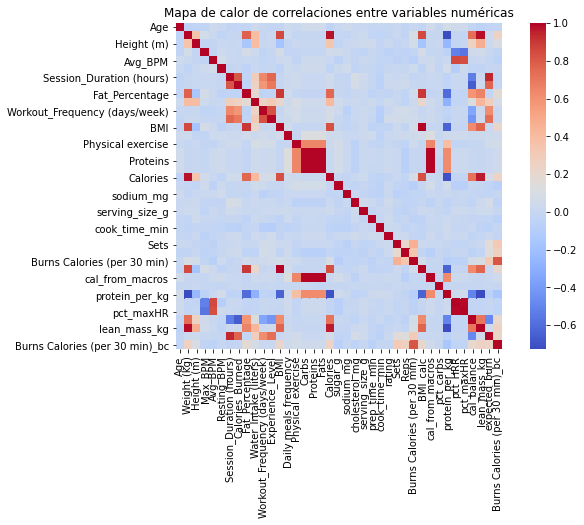

In [26]:
# Limpiamos el dataset para quedarnos únicamente con las filas que no tengan NAs
lifeStyleData = lifeStyleData.dropna()

# Selección de solo las columnas numéricas
numeric_cols = lifeStyleData.select_dtypes(include=["float64"])

# Calculamos la matriz de correlación
corr = numeric_cols.corr()

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Mapa de calor de correlaciones entre variables numéricas", fontsize=12)
plt.show()


Correlación alta con las siguientes variables (positivas, muy rojas): TO DO
Correlación alta con las siguientes variables (negativas, muy azules): TO DO

No hay ninguna que sea especialmente inesperada ya que casi todas tiene bastante sentido que estén muy relacionadas entre sí (por ejemplo, las proteínas y calorías es normal que tengan correlación muy positiva)

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [29]:
## AQUELLAS QUE TENGAN MAYOR CORRELACIÓN CON BMI QUE NO SEAN NI PESO NI ALTURA

# Variable objetivo
targetVar = "BMI"

# Variables predictoras: aquellas que tienen una mayor correlación con el BMI (ya sea positiva o negativa)
predictors = ["Calories", "Fat_Percentage", "protein_per_kg"]

# Seleccionamos columnas correspondientes
X = lifeStyleData[predictors]
y = lifeStyleData[targetVar]

# Variables
print("Variables predictoras (X):")
display(X.head())
print("\nVariable objetivo (y):")
display(y.head())


Variables predictoras (X):


,Calories,Fat_Percentage,protein_per_kg
0,1806.0,26.800377,1.624789
1,1577.0,27.655021,1.514093
2,1608.0,24.320821,1.663445
3,2657.0,32.813572,0.862017
4,1470.0,17.307319,2.538153



Variable objetivo (y):


0    24.87
1    23.48
2    21.15
3    32.45
4    14.83
Name: BMI, dtype: float64

b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")


Tamaño del conjunto de entrenamiento: 13997 filas
Tamaño del conjunto de prueba: 6000 filas


c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones
y_pred_lin = lin_reg.predict(X_test)

# Métricas de rendimiento
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print("Resultado del modelo de Regresión Lineal")
print(f"R²: {r2_lin:.3f}")
print(f"MSE: {mse_lin:.3f}")


Resultado del modelo de Regresión Lineal
R²: 0.870
MSE: 6.032


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [33]:
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_reg.predict(X_test)

# Métricas
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Resultados del modelo de Random Forest")
print(f"R²: {r2_rf:.3f}")
print(f"MSE: {mse_rf:.3f}")


Resultados del modelo de Random Forest
R²: 0.911
MSE: 4.128


In [38]:
## COMPARACIÓN 

print("\nComparativa final de rendimiento:")
print(f"- Regresión Lineal--- R²: {r2_lin:.3f} ; MSE: {mse_lin:.3f}")
print(f"- Random Forest------ R²: {r2_rf:.3f} ; MSE: {mse_rf:.3f}")


Comparativa final de rendimiento:
- Regresión Lineal--- R²: 0.870 ; MSE: 6.032
- Random Forest------ R²: 0.911 ; MSE: 4.128


Para evaluar cual es mejor modelo, se han empleado las siguientes métricas:
- R² (coeficiente de determinación): mide la proporción de varianza explicada por el modelo. Cuanto más cerca de 1 es mejor.
- MSE: error medio cuadrático. También, cuanto menor sea mejor

En este caso, observamos como el modelo de RandomForest es mejor que el modelo de Regresión Lineal porque el coeficiente de determinación es un poco mayor en el random forest (0,91 vs 0,87) y el MSE es menor en random forest tambien (4.128 vs 6.032)

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [43]:
# Creación de la nueva variable: 1 si el IMC está en rango saludable, 0 en caso contrario
lifeStyleData["bmiHealthy"] = lifeStyleData["BMI"].apply(lambda x: 1 if 18.5 <= x <= 24.9 else 0)

# Comprobación mostrando las primeras filas (solo con las columnas bmi y bmiHealthy)
display(lifeStyleData[["BMI", "bmiHealthy"]].head())

# Vemos cuántos hay de cada tipo (por saber) -> menos healthys que no healthy
print(lifeStyleData["bmiHealthy"].value_counts())


,BMI,bmiHealthy
0,24.87,1
1,23.48,1
2,21.15,1
3,32.45,0
4,14.83,0


bmiHealthy
0    12390
1     7607
Name: count, dtype: int64


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [59]:
# Usamos las variables anteriores que identificamos con mayor correlación con el BMI y he añadido alguna más por ver el efecto

# Seleccionamos variables predictoras
predictors = ["Calories", "Fat_Percentage", "protein_per_kg", "Burns Calories (per 30 min)", "Workout_Frequency (days/week)","Physical exercise"]
X = lifeStyleData[predictors]
y = lifeStyleData["bmiHealthy"]

# Dividimos los datos (70% train / 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Creamos y entrenamos el modelo
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


Accuracy del modelo: 0.625


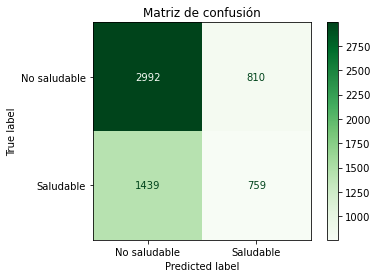

In [60]:
y_pred = log_reg.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy del modelo: {accuracy:.3f}")

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No saludable", "Saludable"])
disp.plot(cmap="Greens")
plt.title("Matriz de confusión")
plt.show()

d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [61]:
# Coeficientes del modelo
importance = pd.DataFrame({
    "Variable": predictors,
    "Coeficiente": log_reg.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

print("Importancia de las variables según el modelo:")
display(importance)

Importancia de las variables según el modelo:


,Variable,Coeficiente
4,Workout_Frequency (days/week),0.332335
5,Physical exercise,0.141208
3,Burns Calories (per 30 min),0.009935
0,Calories,-0.001096
1,Fat_Percentage,-0.086081
2,protein_per_kg,-0.590635


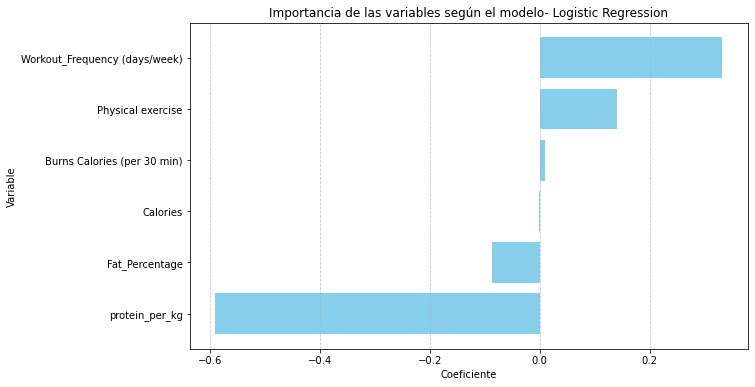

In [63]:
plt.figure(figsize=(10, 6))
plt.barh(importance["Variable"], importance["Coeficiente"], color='skyblue')
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.title("Importancia de las variables según el modelo- Logistic Regression")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Según el gráfico, la variable que más influye en el modelo de Regresión Logística es “Workout_Frequency (days/week)”, ya que tiene el coeficiente más alto y positivo.

Esto significa que, si aumentamos la frecuencia semanal de entrenamiento incrementa la probabilidad de pertenecer a la clase positiva (por ejemplo, tener buena condición física o alcanzar el objetivo del modelo).

Por otro lado, la variable “protein_per_kg” también muestra una fuerte influencia, pero en sentido negativo, lo que sugiere que mayores valores de proteína por kilogramo están asociados con menor probabilidad de la clase positiva según este modelo, es decir, de estar saludable. 

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



A partir del análisis realizado, los hábitos con mayor relación con el estado de salud son la frecuencia de entrenamiento semanal y el nivel de actividad física. Estas variables presentan los coeficientes más altos y positivos en el modelo de regresión logística, lo que indica que una mayor frecuencia de ejercicio y una práctica constante de actividad física se asocian con un mejor estado de salud. En cambio, el consumo de proteínas por kilogramo (me lo imagino) y el porcentaje de grasa corporal muestran una relación negativa, lo que sugiere que niveles más altos de grasa o una ingesta proteica desequilibrada podrían relacionarse con un peor estado físico o una vida menos saludable.

En cuanto al modelo más eficaz, el Random Forest superó al modelo de Regresión Lineal al obtener un R² de 0.911 frente a 0.870 y un MSE de 4.128 frente a 6.032. Esto significa que el Random Forest explica mejor la variabilidad del estado de salud y comete menos error medio cuadrático. No me ha dado tiempo a verificar cuáles son estos valores para el modelo de Regresión Logística.

Si se pudiese tener más tiempo, la idea seria comprobar si otras variables son significativas para el modelo para poder explicar con mayor certeza nuestra variable objetivo.